# COVID-19 Exploration: 2020-05-14

We explore the latest COVID-19 data from https://covidtracking.com/data.

This analysis was inspired in part by this article by Erin Bromage (https://www.erinbromage.com/post/the-risks-know-them-avoid-them).  In particular, she notes that, while new cases are slowing in New York, the pace is still high in much of the United States.  Below, we take a quick look at that breakdown and then explore some other views of the latest numbers.

**Contents:**

* [Load & Clean Data](#Load-&-Clean-Data)
* [All States](#All-States)
* [New York vs The Rest Of US](#New-York-vs-The-Rest-Of-US)
* [Top 10 States](#Top-10-States)
* [Testing](#Testing)
* [Non-Cumulative Deaths](#Non-Cumulative-Deaths)
* [Per-Capita Numbers](#Per-Capita-Numbers)
* [Conclusions](#Conclusions)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('figure', facecolor='w', dpi=130)
plt.rc('grid', alpha=.33)

## Load & Clean Data

We can download the entire spreadsheet from Google Docs.  The URL might go stale in the future, but hopefully an up-to-date link will be maintained at https://covidtracking.com/data.

In [3]:
%%time
x = pd.read_html('https://docs.google.com/spreadsheets/u/2/d/e/'
                 '2PACX-1vRwAqp96T9sYYq2-i7Tj0pvTf6XVHjDSMIKBdZHXiCGGdNC0ypEU9NbngS8mxea55JuCFuua1MUeOj5'
                 '/pubhtml', skiprows=1, index_col=0)

CPU times: user 7.12 s, sys: 76.3 ms, total: 7.19 s
Wall time: 7.79 s


This gives us several tables:

In [4]:
for (i,df) in enumerate(x):
    print(80 * '-')
    print(f'Table {i+1}')
    print(80 * '-')
    display(df.dropna(how='all').head(1))

--------------------------------------------------------------------------------
Table 1
--------------------------------------------------------------------------------


,Unnamed: 1,Unnamed: 2
1,,
2,"The COVID Tracking Project, launched from The ...",NaN


--------------------------------------------------------------------------------
Table 2
--------------------------------------------------------------------------------


,State,Unnamed: 2,Positive,Negative,Pending,HospitalizedÂ â Currently,Hospitalized â Cumulative,In ICU âÂ Currently,In ICU âÂ Cumulative,On Ventilator âÂ Currently,On Ventilator âÂ Cumulative,Recovered,Deaths,Last update (ET),Check time (ET)
1,,,,,,,,,,,,,,,
2.0,AK,NaN,383.0,30266.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,338.0,10.0,5/13 00:00,5/13 16:08


--------------------------------------------------------------------------------
Table 3
--------------------------------------------------------------------------------


,Positive,Negative,Pending,HospitalizedÂ â Currently,Hospitalized â Cumulative,In ICU âÂ Currently,In ICU âÂ Cumulative,On Ventilator âÂ Currently,On Ventilator âÂ Cumulative,Recovered,Deaths
1,,,,,,,,,,,
2,1382304,8592527,1983,44514,149347,11445,6713,6419,572,243430,78343


--------------------------------------------------------------------------------
Table 4
--------------------------------------------------------------------------------


,Date,State,Positive,Negative,Pending,HospitalizedÂ â Currently,Hospitalized â Cumulative,In ICU âÂ Currently,In ICU âÂ Cumulative,On Ventilator âÂ Currently,On Ventilator âÂ Cumulative,Recovered,Deaths,Data Quality Grade,Last Update ET
1,,,,,,,,,,,,,,,
2.0,20200513.0,AK,383.0,30266.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,338.0,10.0,B,5/13/2020 00:00


--------------------------------------------------------------------------------
Table 5
--------------------------------------------------------------------------------


,Date,States,Positive,Negative,Pending,Hospitalized â Currently,Hospitalized â Cumulative,In ICU â Currently,In ICU â Cumulative,On Ventilator â Currently,On Ventilator â Cumulative,Recovered,Deaths
1,,,,,,,,,,,,,
2.0,20200513.0,56.0,1382304.0,8592527.0,1983.0,44514.0,149347.0,10978.0,6713.0,6156.0,572.0,243430.0,78343.0


--------------------------------------------------------------------------------
Table 6
--------------------------------------------------------------------------------


,State,COVID-19 site,COVID-19 site (secondary),Twitter,Notes
1,,,,,
2.0,AK,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,@Alaska_DHSS,Total tests are taken from the annotations on ...


Of these, we'll take just a few columns from `x[3]` and clean up the Date column.

In [5]:
states = x[3][['Date', 'State', 'Positive', 'Negative', 'Pending', 'Recovered', 'Deaths', 'Data Quality Grade']]
states = states[~states.Date.isna()]
states = states.sort_values('Date State'.split(), ascending=True).reset_index(drop=True)
states['Date'] = pd.to_datetime(states.Date.astype(str), format='%Y%m%d')
states['days'] = states.Date.map({d:i for (i,d) in enumerate(np.unique(states.Date.values))})

In [6]:
print(states.shape)
states.tail()

(3881, 9)


,Date,State,Positive,Negative,Pending,Recovered,Deaths,Data Quality Grade,days
3876,2020-05-13,VT,929.0,20747.0,NaN,789.0,53.0,B,112
3877,2020-05-13,WA,17330.0,238991.0,NaN,NaN,962.0,A,112
3878,2020-05-13,WI,10902.0,117111.0,194.0,5673.0,421.0,A+,112
3879,2020-05-13,WV,1398.0,65282.0,NaN,813.0,58.0,B,112
3880,2020-05-13,WY,675.0,14384.0,NaN,477.0,7.0,B,112


We'll be making lots of timeseries plots, so the following will help with getting clean axis ticks.

In [7]:
# start from February
xtickdatesf = pd.to_datetime('2020-02-01 2020-03-01 2020-04-01 2020-05-01'.split())
# start from March
xtickdatesm = xtickdatesf[1:]

## All States

We can get a quick initial overview with a simple Seaborn lineplot:

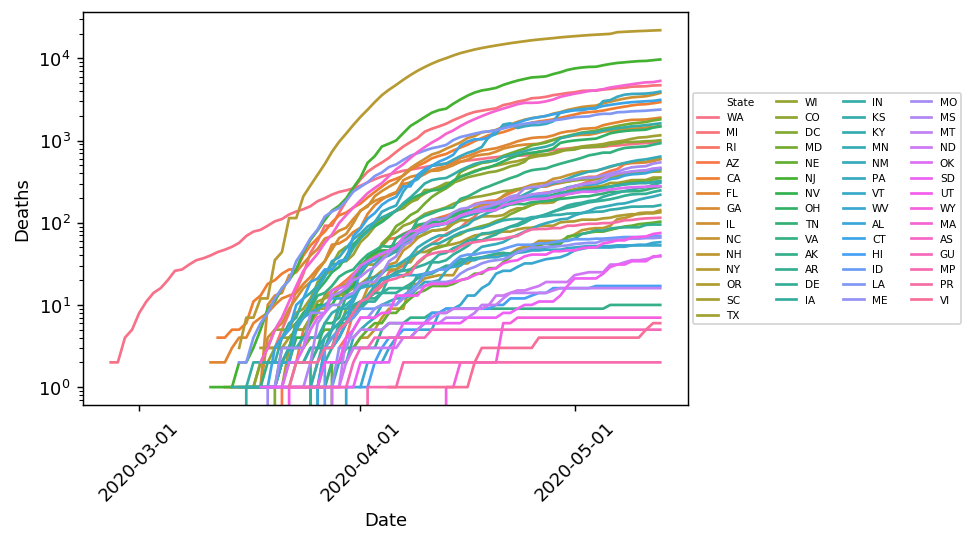

In [8]:
sns.lineplot('Date', 'Deaths', data=states, hue='State')
legend = plt.legend(loc='center left', bbox_to_anchor=[1, .5], ncol=4, prop=dict(size='xx-small'))
plt.xticks(xtickdatesm)
plt.semilogy()
plt.xticks(rotation=45);

## New York vs The Rest Of US

This is what I was initially interested in: how are we doing aside from New York, which had the most severe outbreak in America and subsequently took some of the more intense countermeasures?

In [9]:
totals = states.groupby('Date days'.split(), as_index=False) \
        .agg(dict(Deaths=sum, Positive=sum, Negative=sum, Pending=sum, Recovered=sum))

is_NY = states.State.eq('NY')
NY = states[is_NY]
totals_minus_NY = states[~is_NY].groupby('Date days'.split(), as_index=False) \
        .agg(dict(Deaths=sum, Positive=sum, Negative=sum, Pending=sum, Recovered=sum))

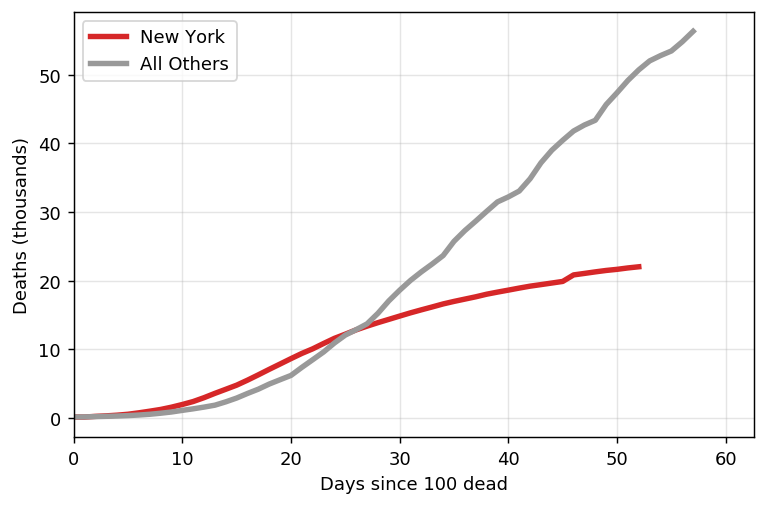

In [10]:
fig, ax = plt.subplots()
f = 1e3
ndead = 100

d = NY
d0 = d.days[d.Deaths >= ndead].values[0]
ax.plot(d.days - d0, d.Deaths/f, color='C3', lw=3, label='New York')
d = totals_minus_NY
d0 = d.days[d.Deaths >= ndead].values[0]
ax.plot(d.days - d0, d.Deaths/f, color='.6', lw=3, label='All Others')
ax.legend(loc='upper left')
ax.grid()
ax.set_xlim(0)
ax.set_xlabel(f'Days since {ndead} dead')
ax.set_ylabel('Deaths (thousands)')
plt.tight_layout()

Logarithmic plots are often used to track the pandemic, and for good reason – how else can we simultaneously view early and late trends in the face of exponential viral spread?  But a linear plot makes clear that deaths are still very much on the rise.

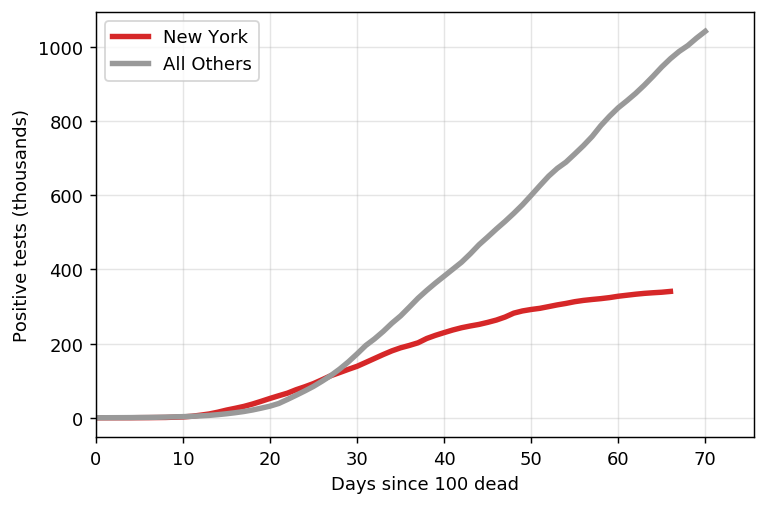

In [11]:
fig, ax = plt.subplots()
f = 1e3
ndead = 100

d = NY
d0 = d.days[d.Positive >= ndead].values[0]
ax.plot(d.days - d0, d.Positive/f, color='C3', lw=3, label='New York')
d = totals_minus_NY
d0 = d.days[d.Positive >= ndead].values[0]
ax.plot(d.days - d0, d.Positive/f, color='.6', lw=3, label='All Others')
ax.legend(loc='upper left')
ax.grid()
ax.set_xlim(0)
ax.set_xlabel(f'Days since {ndead} dead')
ax.set_ylabel('Positive tests (thousands)')
plt.tight_layout()

Deaths are, of course, a lagging indicator – it can take weeks for the virus to kill a person.  Nevertheless, the situation isn't looking much better in terms of positive tests.

## Top 10 States

We cherry-picked New York above, following Erin Bromage's observations.  But this obscures the situation in other states with significant outbreaks.  Let's look at the top 10 states in terms of deaths to date.

In [12]:
nstates = 10
top_n_states = states.groupby('State').Deaths.max().sort_values(ascending=False).index.values[:nstates]
top_n_states

array(['NY', 'NJ', 'MA', 'MI', 'PA', 'IL', 'CT', 'CA', 'LA', 'FL'],
      dtype=object)

In [13]:
def days_since(df, n=100, col='Deaths'):
    mask = df[col] >= n
    if not mask.sum():
        return None
    d0 = df[mask].days.values.min()
    return df.days - d0

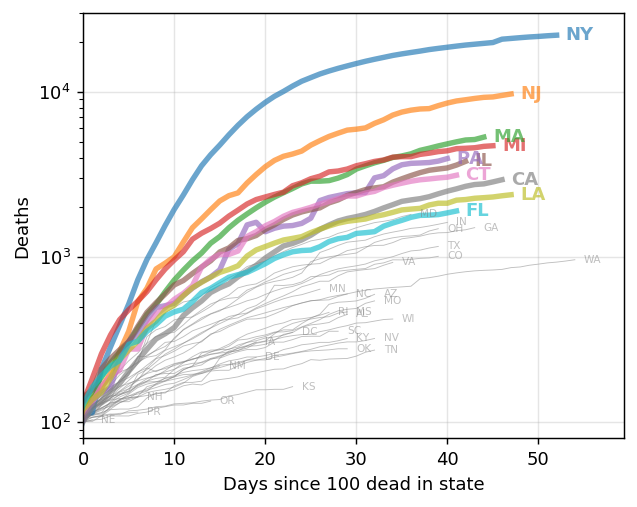

In [14]:
fig, ax = plt.subplots(figsize=(5,4))
ndead = 100
for (i,state) in enumerate(top_n_states):
    d = states[states.State.eq(state)]
    days = days_since(d, ndead)
    line = ax.plot(days, d.Deaths, label=state, lw=3, alpha=.66)[0]
    color = line.get_color()
    ax.text(days.max() + 1, d.Deaths.max(), state, color=color, va='center', alpha=.66, zorder=50-i, weight='bold')
for state in states.State.unique():
    if state in top_n_states:
        continue
    d = states[states.State.eq(state)]
    days = days_since(d, ndead)
    if days is None:
        continue
    ax.plot(days_since(d, ndead), d.Deaths, color='.5', alpha=.5, lw=.5, zorder=-20)
    ax.text(days.max() + 1, d.Deaths.max(), state, color='.5', va='center', alpha=.5, zorder=20, size='xx-small')
ax.set_xlim(0)
ax.set_ylim(.8*ndead, 3e4)
#ax.legend(loc='center left', bbox_to_anchor=[1, .5], title='State')
ax.grid()
ax.set_xlabel(f'Days since {ndead} dead in state')
ax.set_ylabel('Deaths')
ax.semilogy()
plt.tight_layout()

As has been widely reported, in addition to the mid-Atlantic region, there are significant outbreaks in the Midwest, Southeast, and California.

As noted above, the logarithmic axis lets us see everything, but it makes comparisons difficult.

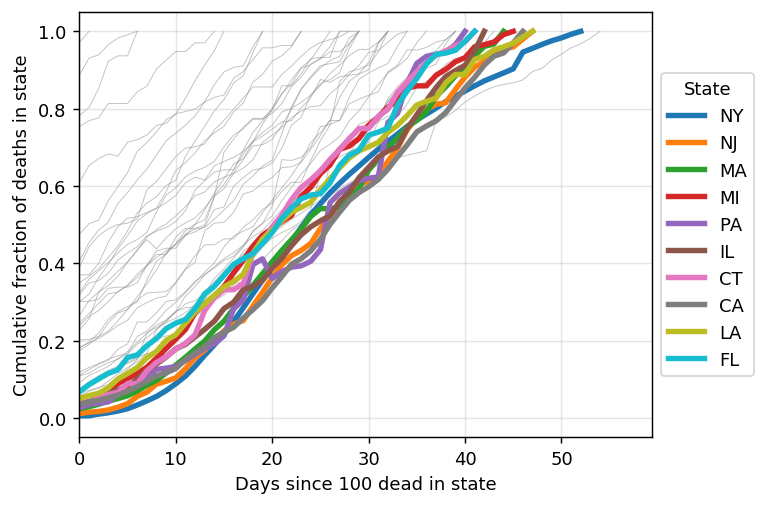

In [15]:
fig, ax = plt.subplots()
ndead = 100
for state in top_n_states:
    d = states[states.State.eq(state)]
    ax.plot(days_since(d, ndead), d.Deaths / d.Deaths.max(), label=state, lw=3)
for state in states.State.unique():
    if state in top_n_states:
        continue
    d = states[states.State.eq(state)]
    days = days_since(d, ndead)
    if days is None:
        continue
    ax.plot(days_since(d, ndead), d.Deaths / d.Deaths.max(), color='.5', alpha=.5, lw=.5, zorder=-20)
ax.set_xlim(0)
ax.legend(loc='center left', bbox_to_anchor=[1, .5], title='State')
ax.grid()
ax.set_xlabel(f'Days since {ndead} dead in state')
ax.set_ylabel('Cumulative fraction of deaths in state')
#ax.semilogy()
plt.tight_layout()

By normalizing to deaths-to-date, we can compare the latest trends across states with very different populations (and thus total death rates).  Here we see again that New York is the only state with a significant slowdown in recent days.

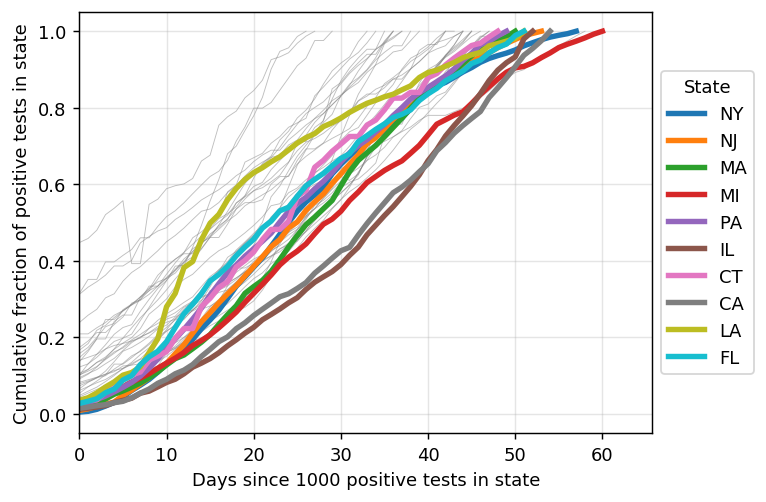

In [16]:
fig, ax = plt.subplots()
npos = 1000
for state in top_n_states:
    d = states[states.State.eq(state)]
    ax.plot(days_since(d, npos, 'Positive'), d.Positive / d.Positive.max(), label=state, lw=3)
for state in states.State.unique():
    if state in top_n_states:
        continue
    d = states[states.State.eq(state)]
    days = days_since(d, ndead)
    if days is None:
        continue
    ax.plot(days_since(d, npos, 'Positive'), d.Positive / d.Positive.max(), color='.5', alpha=.5, lw=.5, zorder=-20)
ax.set_xlim(0)
ax.legend(loc='center left', bbox_to_anchor=[1, .5], title='State')
ax.grid()
ax.set_xlabel(f'Days since {npos} positive tests in state')
ax.set_ylabel('Cumulative fraction of positive tests in state')
#ax.semilogy()
plt.tight_layout()

Things are less clear when looking at positive tests in this way.  Positive tests have slowed down significantly in Louisiana, and more recently Michigan.  But they are speeding up in California and Illinois.

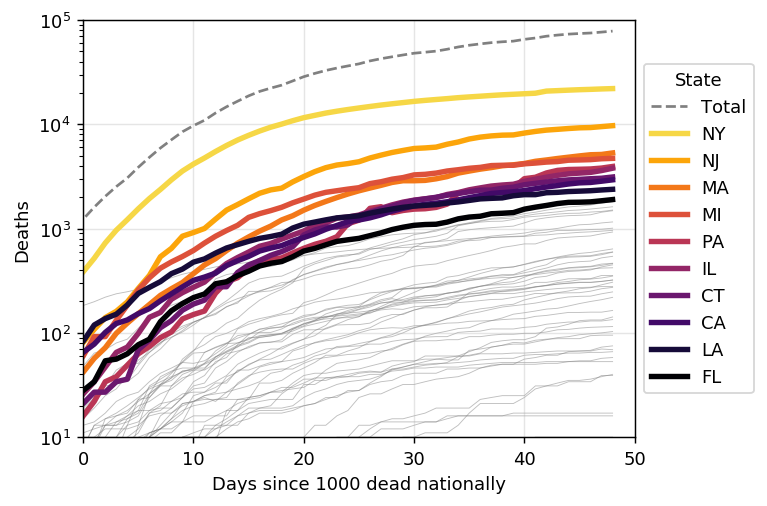

In [17]:
fig, ax = plt.subplots()
ndead = 1000
d0 = totals[totals.Deaths >= ndead].days.values.min()
cmap = plt.get_cmap('inferno_r')
ax.plot(totals.days - d0, totals.Deaths, label='Total', lw=1.5, ls='--', color='.5')
for (i,state) in enumerate(top_n_states):
    d = states[states.State.eq(state)]
    ax.plot(d.days - d0, d.Deaths, label=state, lw=3, color=cmap((i+1)/nstates))
for state in states.State.unique():
    if state in top_n_states:
        continue
    d = states[states.State.eq(state)]
    ax.plot(d.days - d0, d.Deaths, color='.5', alpha=.5, lw=.5, zorder=-20)
ax.set_xlim(0, 50)
ax.set_ylim(10, 1e5)
ax.grid()
ax.legend(loc='center left', bbox_to_anchor=[1, .5], title='State')
ax.semilogy()
ax.set_xlabel(f'Days since {ndead} dead nationally')
ax.set_ylabel('Deaths')
plt.tight_layout()

The details differ from state to state – in part because, frankly, the US Federal response has been an unmitigated disaster.  But overall the trend is consistent: deaths increase at an alarming rate until state government panics, at which point they introduce various half-measures that slow but do not halt viral spread.

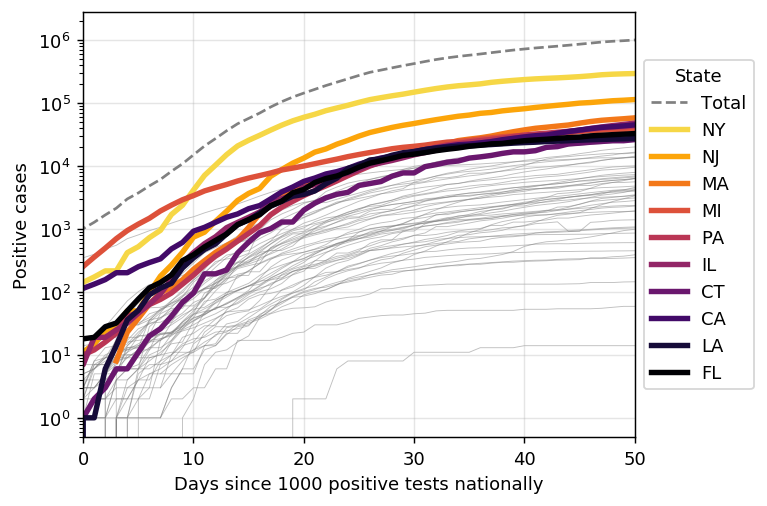

In [18]:
fig, ax = plt.subplots()
npos = 1000
d0 = totals[totals.Positive >= npos].days.values.min()
cmap = plt.get_cmap('inferno_r')
ax.plot(totals.days - d0, totals.Positive, label='Total', lw=1.5, ls='--', color='.5')
for (i,state) in enumerate(top_n_states):
    d = states[states.State.eq(state)]
    ax.plot(d.days - d0, d.Positive, label=state, lw=3, color=cmap((i+1)/nstates))
for state in states.State.unique():
    if state in top_n_states:
        continue
    d = states[states.State.eq(state)]
    ax.plot(d.days - d0, d.Positive, color='.5', alpha=.5, lw=.5, zorder=-20)
ax.set_xlim(0, 50)
#ax.set_ylim(10, 3e4)
ax.grid()
ax.legend(loc='center left', bbox_to_anchor=[1, .5], title='State')
ax.semilogy()
ax.set_xlabel(f'Days since {npos} positive tests nationally')
ax.set_ylabel('Positive cases')
plt.tight_layout()

If the above interpretation is correct, then that could explain why there's arguably more variance in the positive cases curves: testing practices vary, but deaths are much harder to ignore.

## Testing

So about that testing data...

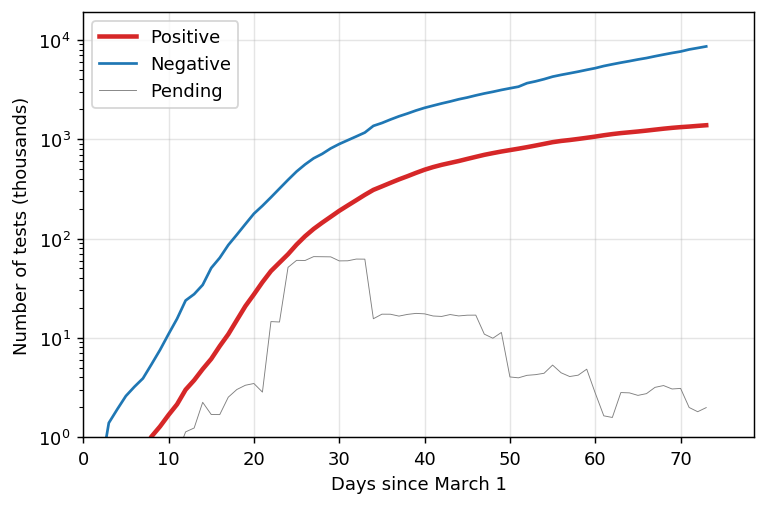

In [19]:
fig, ax = plt.subplots()
colors = 'C3', 'C0', '.5'
d0 = totals[totals.Date >= pd.to_datetime('2020-03-01')].days.min()
for (i,c) in enumerate('Positive Negative Pending'.split()):
    ax.plot(totals.days-d0, totals[c] / 1e3, label=c, color=colors[i], lw=2.5 - i)
ax.semilogy()
ax.set_xlim(0)
ax.set_ylim(1)
ax.set_xlabel('Days since March 1')
ax.set_ylabel('Number of tests (thousands)')
ax.grid()
ax.legend()
plt.tight_layout()

The number of pending tests on a given day is trending downward, which suggests that turn-around time is decreasing.  Meanwhile the number of negative tests is increasing faster than the number of positives.  This suggests that testing is improving overall, which is definitely a good thing.

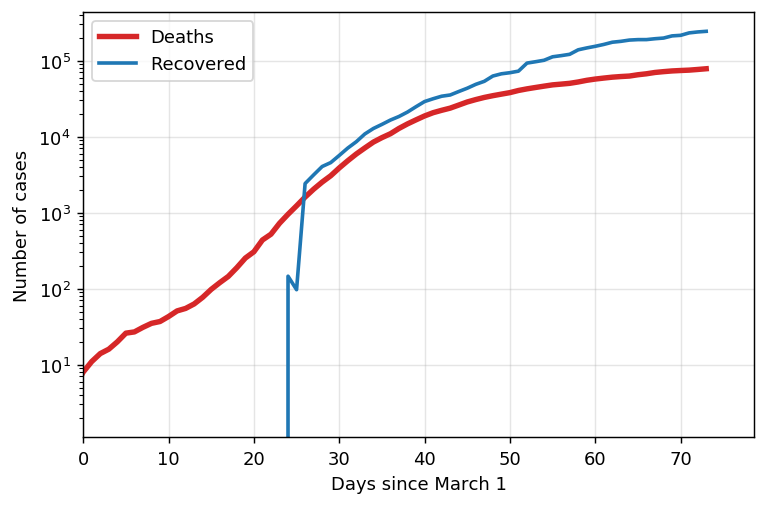

In [20]:
fig, ax = plt.subplots()
ax.plot(totals.days - d0, totals.Deaths, label='Deaths', color='C3', lw=3)
ax.plot(totals.days - d0, totals.Recovered, label='Recovered', color='C0', lw=2)
ax.legend()
ax.semilogy()
ax.set_xlim(0)
ax.set_xlabel('Days since March 1')
ax.set_ylabel('Number of cases')
ax.grid()
plt.tight_layout()

Comparing deaths to recoveries, there appears to be a lag: it takes time to declare a recovery, but we know a death when we see it.  Nevertheless, recoveries are currently increasing at a higher rate than deaths.  Maybe we are slowly getting better at treating the disease?

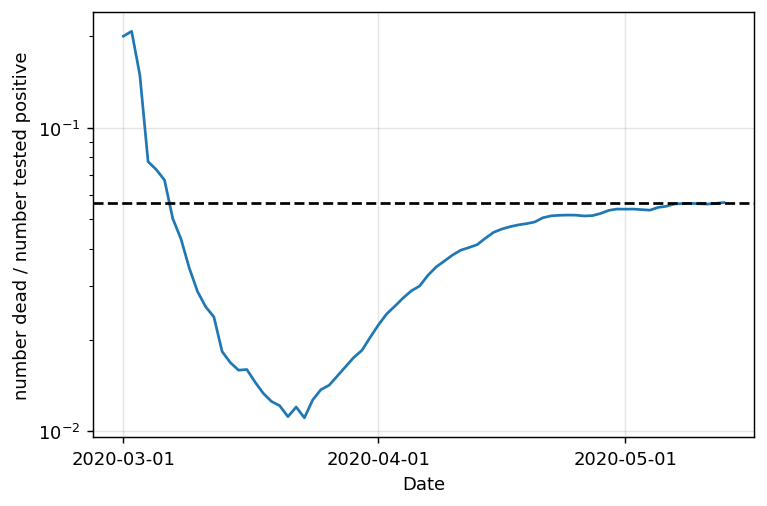

In [21]:
fig, ax = plt.subplots()
d = totals[totals.Date >= pd.to_datetime('2020-03-01')]
ax.plot(d.Date, d.Deaths / d.Positive)
ax.axhline((d.Deaths / d.Positive).values[-1], color='k', ls='--', lw=1.5)
ax.semilogy()
ax.set_xticks(xtickdatesm)
ax.grid()
ax.set_xlabel('Date')
ax.set_ylabel('number dead / number tested positive')
plt.tight_layout()

As mentioned above, deaths naturally lag behind positive tests, at least assuming prompt testing.  Nevertheless, we can look at the ratio of deaths to positive tests to get some handle on the death rate.  Over time this figure seems to be stabilizing around 6% in the US.  This should give some pause regarding any hope that we are rapidly learning how to defeat this "invisible enemy".

## Non-Cumulative Deaths

So far, with the exception of pending test results, we've been looking at cumulative numbers.  What about the daily tallies?

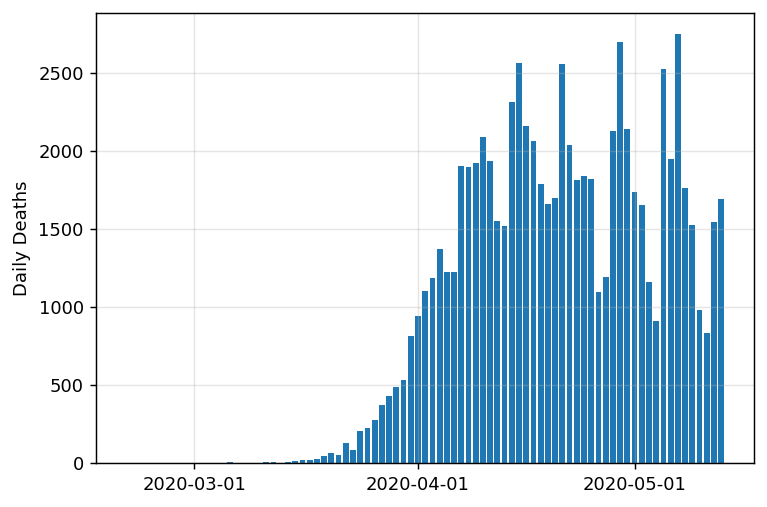

In [22]:
fig, ax = plt.subplots()
d = totals[totals.Date >= pd.to_datetime('2020-02-20')]
#d = totals
ax.bar(d.Date, d.Deaths.diff())
ax.set_xticks(xtickdatesm)
ax.set_ylabel('Daily Deaths')
ax.grid()
plt.tight_layout()

Maybe you've noticed on world-o-meter that daily new deaths seem to decrease on the weekend.  That effect is visible in this dataset as well.

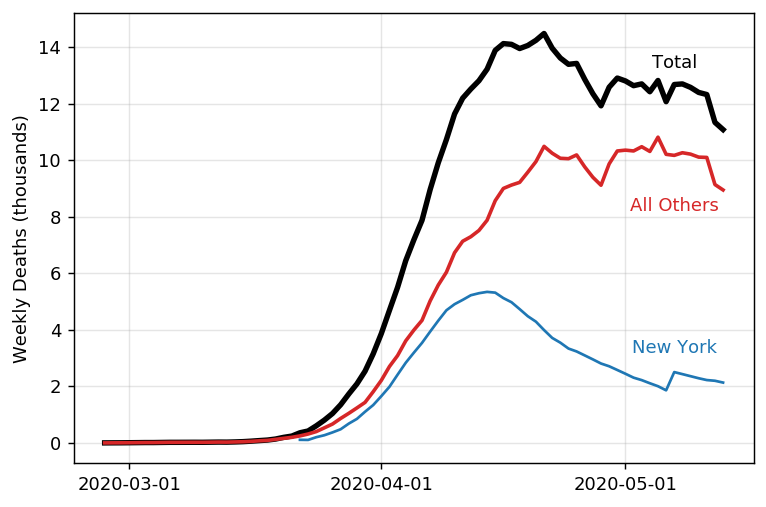

In [23]:
fig, ax = plt.subplots()
ld = pd.to_datetime('2020-05-07')
d0 = pd.to_datetime('2020-02-20')

d = totals[totals.Date >= d0]
ax.plot(d.Date, d.Deaths.rolling(7).sum().diff() / 1e3, color='k', lw=3)
ax.text(ld, 13.25, 'Total', ha='center')

d = NY[NY.Date >= d0]
ax.plot(d.Date, d.Deaths.rolling(7).sum().diff() / 1e3)
ax.text(ld, 3.2, 'New York', color='C0', ha='center')

d = totals_minus_NY[totals_minus_NY.Date >= d0]
ax.plot(d.Date, d.Deaths.rolling(7).sum().diff() / 1e3, color='C3', lw=2)
ax.text(ld, 8.2, 'All Others', color='C3', ha='center')

ax.set_xticks(xtickdatesm)
ax.set_ylabel('Weekly Deaths (thousands)')
#ax.semilogy()
ax.grid()
plt.tight_layout()

There is some danger in smoothing these curves, as we inherently lose detail on the last few days.  But it's still instructive to take a weekly rolling average and compare, once again, New York against the rest of the US.  Once again we see that the apparent progress we've made in slowing the rise of the death toll has indeed been mostly confined to New York.

And that's born out by a more detailed look at the state-by-state breakdown:

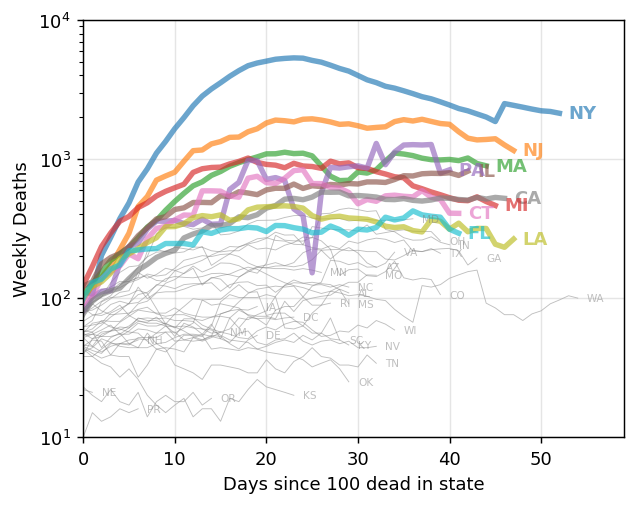

In [24]:
fig, ax = plt.subplots(figsize=(5,4))
ndead = 100
Y = lambda x: x.rolling(7).sum().diff()
for (i,state) in enumerate(top_n_states):
    d = states[states.State.eq(state)]
    days = days_since(d, ndead)
    y = Y(d.Deaths)
    line = ax.plot(days, y, label=state, lw=3, alpha=.66)[0]
    color = line.get_color()
    ax.text(days.max() + 1, y.values[-1], state, color=color, va='center', alpha=.66, zorder=50-i, weight='bold')
for state in states.State.unique():
    if state in top_n_states:
        continue
    d = states[states.State.eq(state)]
    days = days_since(d, ndead)
    if days is None:
        continue
    y = Y(d.Deaths)
    ax.plot(days_since(d, ndead), y, color='.5', alpha=.5, lw=.5, zorder=-20)
    ax.text(days.max() + 1, y.values[-1], state, color='.5', va='center', alpha=.5, zorder=20, size='xx-small')
ax.set_xlim(0)
ax.set_ylim(10, 1e4)
ax.semilogy()
#ax.set_ylim(top=3e3)
ax.grid()
ax.set_xlabel(f'Days since {ndead} dead in state')
ax.set_ylabel('Weekly Deaths')
plt.tight_layout()

## Per-Capita Numbers

Per-capita numbers might be interesting, so we fetch population data and a name <--> abbreviation mapping from Wikipedia:

In [25]:
wp = pd.read_html('https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population')[0]
wa = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations', skiprows=9)[0]

In [26]:
abbreviations = pd.DataFrame(dict(Name=wa['Name and status of region'], State=wa['ANSI'])).dropna()
populations = pd.DataFrame(dict(
    Name=[s[0] for s in wp['State'].values],
    Population=wp[('Census population', 'Estimate, July 1, 2019[5]')].values))
populations = pd.merge(populations, abbreviations, on='Name')['State Name Population'.split()].copy()

In [27]:
populations.sort_values('Population', ascending=False).head(10)

,State,Name,Population
0,CA,California,39512223
1,TX,Texas,28995881
2,FL,Florida,21477737
3,NY,New York,19453561
4,PA,Pennsylvania,12801989
5,IL,Illinois,12671821
6,OH,Ohio,11689100
7,GA,Georgia,10617423
8,NC,North Carolina,10488084
9,MI,Michigan,9986857


We make a copy of the per-state data that includes death per million residents and compute the top 10 states by that metric:

In [28]:
states2 = pd.merge(states, populations, on='State')
states2['Deaths Per Million'] = states2.Deaths / states2.Population * 1e6

top_n_states_pm = states2.groupby('State')['Deaths Per Million'].max().sort_values(ascending=False).index.values[:nstates]
top_n_states_pm

array(['NY', 'NJ', 'CT', 'MA', 'LA', 'DC', 'MI', 'RI', 'PA', 'IL'],
      dtype=object)

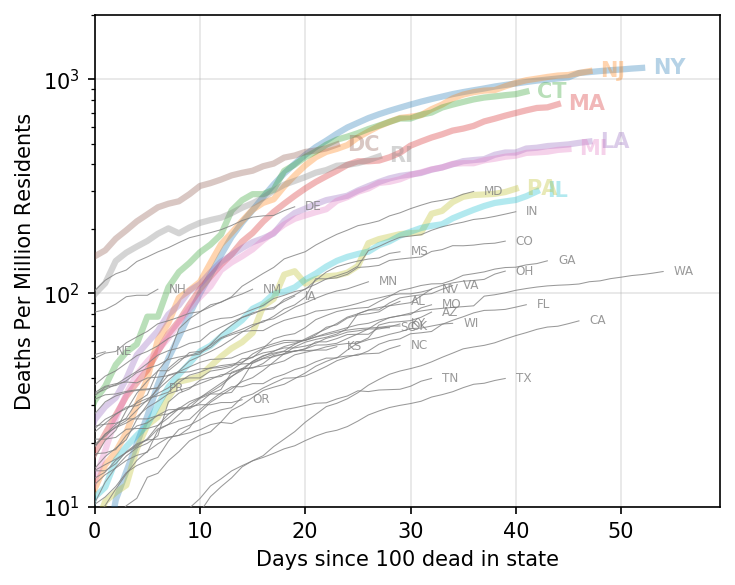

In [29]:
fig, ax = plt.subplots(figsize=(5,4), dpi=150)
ndead = 100
# dict for overall scaling
dpops = dict(zip(populations.State, populations.Population))
for (i,state) in enumerate(top_n_states_pm):
    d = states[states.State.eq(state)]
    days = days_since(d, ndead)
    pop = dpops[state]
    y = d.Deaths / pop * 1e6
    line = ax.plot(days, y, label=state, lw=3, alpha=.33, zorder=10)[0]
    color = line.get_color()
    ax.text(days.max() + 1, y.max(), state, color=color, va='center', alpha=.33, zorder=50-i, weight='bold')
for state in states.State.unique():
    if state in top_n_states_pm:
        continue
    d = states[states.State.eq(state)]
    days = days_since(d, ndead)
    if days is None:
        continue
    pop = dpops[state]
    y = d.Deaths / pop * 1e6
    ax.plot(days_since(d, ndead), y, color='.5', alpha=.8, lw=.5, zorder=20)
    ax.text(days.max() + 1, y.max(), state, color='.5', va='center', alpha=.8, zorder=20, size='xx-small')
ax.set_xlim(0)
ax.set_ylim(10, 2e3)
ax.semilogy()
ax.grid()
ax.set_xlabel(f'Days since {ndead} dead in state')
ax.set_ylabel('Deaths Per Million Residents')
plt.tight_layout()

Here we see a bit more clearly that the fate of a state overall is determined mostly by its urban/rural balance.  It would be best to use population density data directly, but I don't feel like going back to Wikipedia for another table so that remains TODO for me.

In [30]:
latest = states.groupby('State', as_index=False).Deaths.max().merge(populations, on='State')
latest['Deaths Per Million'] = latest.Deaths / latest.Population * 1e6

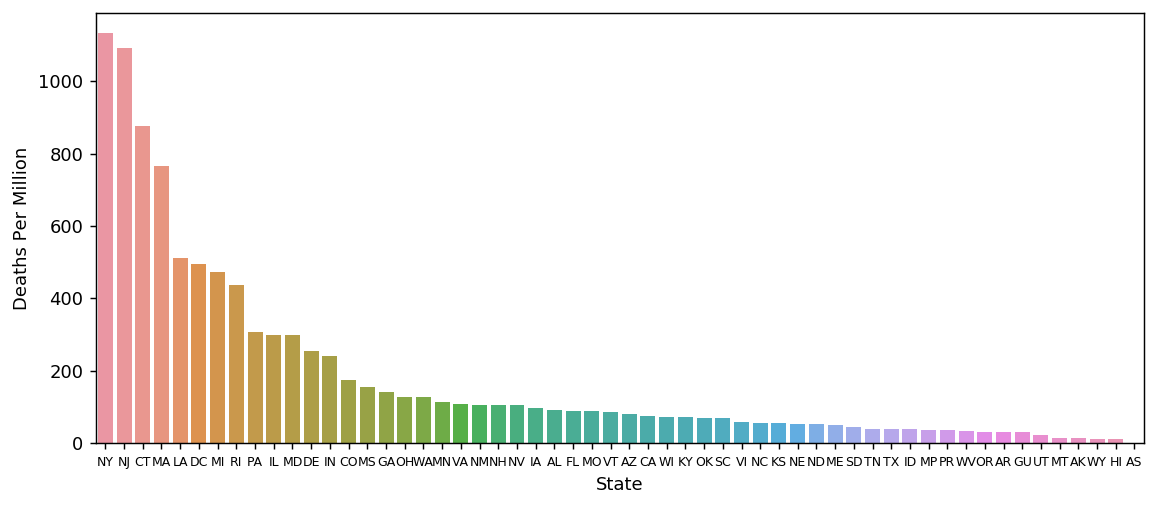

In [31]:
fig, ax = plt.subplots(figsize=(9,4))
sns.barplot('State', 'Deaths Per Million',
            data=latest.sort_values('Deaths Per Million', ascending=False),
            ax=ax)
plt.xticks(size='x-small')
#ax.semilogx()
plt.tight_layout()

This is just another view of the latest total per-capita death tolls.

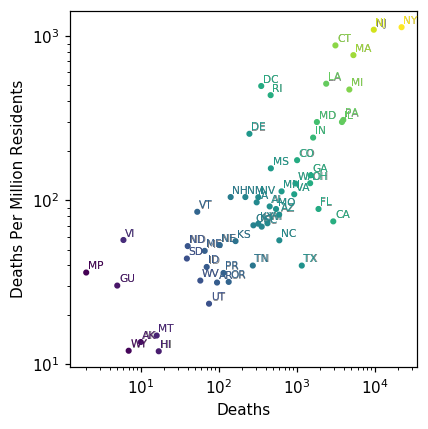

In [32]:
fig, ax = plt.subplots(figsize=(4,4), dpi=110)
d = latest[latest.Deaths > 0]
X = d.Deaths
Y = d['Deaths Per Million']
both = np.log(X * Y)
sc = ax.scatter(X, Y, marker='.', c=both)
for (i,(x, y, z)) in enumerate(zip(X.values, Y.values, both.values)):
    x, y = 1.05*x, 1.05*y
    ax.text(x, y, d.State.values[i], color=sc.to_rgba(z), size='x-small')
    offset = 1.005
    ax.text(x*offset, y/offset, d.State.values[i], color='.5', size='x-small', zorder=-20)
ax.loglog()
ax.set_xlabel('Deaths')
ax.set_ylabel('Deaths Per Million Residents')
plt.tight_layout()

Interestingly, per-capita and total deaths are highly correlated.  This makes sense if population density is the strongest causal factor.

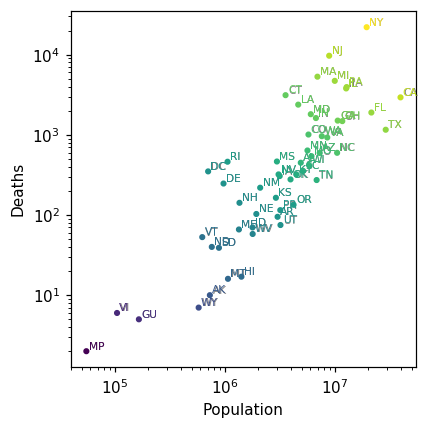

In [33]:
fig, ax = plt.subplots(figsize=(4,4), dpi=110)
d = latest[latest.Deaths > 0]
X = d.Population
Y = d['Deaths']
both = np.log(X * Y)
sc = ax.scatter(X, Y, marker='.', c=both)
for (i,(x, y, z)) in enumerate(zip(X.values, Y.values, both.values)):
    x, y = 1.05*x, 1.05*y
    ax.text(x, y, d.State.values[i], color=sc.to_rgba(z), size='x-small')
    offset = 1.005
    ax.text(x*offset, y/offset, d.State.values[i], color='.5', size='x-small', zorder=-20)
ax.loglog()
ax.set_xlabel('Population')
ax.set_ylabel('Deaths')
plt.tight_layout()

Of course, total deaths are also highly correlated with population.

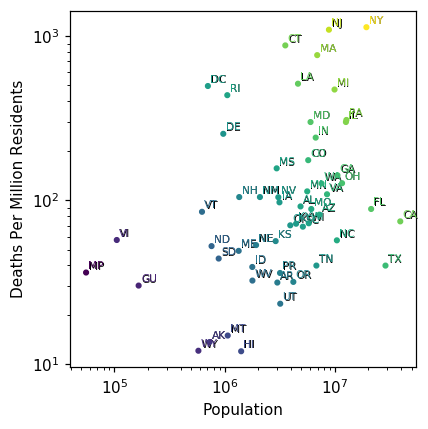

In [34]:
fig, ax = plt.subplots(figsize=(4,4), dpi=110)
d = latest[latest.Deaths > 0]
X = d.Population
Y = d['Deaths Per Million']
both = np.log(X * Y)
sc = ax.scatter(X, Y, marker='.', c=both)
for (i,(x, y, z)) in enumerate(zip(X.values, Y.values, both.values)):
    x, y = 1.05*x, 1.05*y
    ax.text(x, y, d.State.values[i], color=sc.to_rgba(z), size='x-small')
    offset = 1.01
    ax.text(x*offset, y/offset, d.State.values[i], color='k', size='x-small', zorder=-20)
ax.loglog()
ax.set_xlabel('Population')
ax.set_ylabel('Deaths Per Million Residents')
plt.tight_layout()

Here we see that there's even some correlation between per-capita deaths and total population.  Again, all of this suggests that it's important to revisit this with population density data.

## Conclusions

* We're eff'd.

Stay home if you can, wear a mask when you go out.  Keep your distance from your neighbors like your and their lives depend on it – because they do.

Be safe out there.